# CS 109A/STAT 121A/AC 209A/CSCI E-109A: 
# Midterm - 2017

**Harvard University**<br/>
**Fall 2017**<br/>
**Instructors**: Pavlos Protopapas, Kevin Rader, Rahul Dave, Margo Levine

---

### INSTRUCTIONS


- You must submit the Midterm on your own. ** No group submissions are allowed**. You may use any print or online resources but ** you may not work or consult with others**.
- Restart the kernel and run the whole notebook again before you submit. 
- Please submit both a notebook and a pdf.
 

---


## Flight Delays

The U.S. Department of Transportation's (DOT) Bureau of Transportation Statistics tracks the on-time performance of domestic flights operated by large air carriers. Summary information on the number of on-time, delayed, canceled, and diverted flights are published in DOT's monthly Air Travel Consumer Report and in this dataset of 2015 flight delays and cancellations.


## Data
Each entry of the flights.csv file corresponds to a flight.  More than 5,800,000 flights were recorded in 2015. These flights are described according to 31 variables. Further details of these variables can be found <a href='https://www.transtats.bts.gov/DL_SelectFields.asp?Table_ID=236&DB_Short_Name=On-Time'>here</a>, if you are interested (not needed to answer these questions). 


 

|          Name          | Type | DESCRIPTION |
|--------------------------------|---|----------------------------------------------------------------------|
| DATE                     | object | The date in python datetime format |
| MONTH                     | int64 | The month of the year(1-12) |
| DAY                       | int64 | The day of the month |
| DAY_OF_WEEK               | int64 | The day of the week(1-7, MON-SUN) |
| AIRLINE                  | object | An identifier for the airline |
| FLIGHT_NUMBER             | int64 | The flight number |
| TAIL_NUMBER              | object | The tail number (aircraft) corresponding to this flight |
| ORIGIN_AIRPORT           | object | The code for origin airport |
| DESTINATION_AIRPORT      | object | The code for destination airport |
| SCHED_DEP                | object | The departure time in python datetime.time format |
| SCHED_ARR                | object | The arrival time in python datetime.time format |
| DEPARTURE_DELAY         |  float64| The delay incurred at the origin  (mins) |
| ARRIVAL_DELAY           | float64 | The delay when the flight reached the (mins) destination |
| DISTANCE                  | int64 | Distance in miles between origin and destination |
| SCHEDULED_TIME          | float64 | Scheduled time of flight (minutes) |
| ELAPSED_TIME            | float64 | Actual time of flight (minutes) |
| AIR_SYSTEM_DELAY        | float64 | What part of the delay was NASD?(mins) |
| SECURITY_DELAY          | float64 | What part of the delay was due to security problems? (mins) |
| AIRLINE_DELAY           | float64 | What part of the delay is due to the airline? (mins) |
| LATE_AIRCRAFT_DELAY     | float64 | What part of the delay is due to previous flight(s) being late(mins) |
| WEATHER_DELAY           | float64 | Delay due to extreme weather events(min) |

You can read more about the various weather delays [here](https://www.rita.dot.gov/bts/help/aviation/html/understanding.html) if you are so inclined.



## Data/Caveats

The data file, flights.csv, is found <a href="https://drive.google.com/file/d/0B9dVesTppCgHY0IwZHk3SGhjd00/view?usp=sharing">here</a> (note, it is about 70MB). 

This data is already preprocessed, reduced, partially cleaned and therefore not identical to the original dataset.

## Problem Description

We will build two separate models: one model that classifies whether a flight will be delayed and a second model that predicts the length of delay given that a flight is truly delayed. Only consider models taught in class so far. 

** Consider the following: **
This is a large dataset; think of strategies on how to solve this problem. Create a manageable subsample of the data that you can use to train and test/validate, but eventually you should predict on all the data (excluding the training set).

### Questions
1. (5pts) Create a new variable, `DELAY_OR_NOT`: a boolean/indicator variable which indicates any arrival delay under 15 mins as a 0, and any delay at or above 15 mins as a 1 (`ARRIVAL_DELAY >= 15`).
2. (5pts) Make sure you understand the data variable descriptions before you start the analysis. Consider all the columns and determine and list which of these predictors should not be used. 
3. (15pts) Perform EDA to gain intuition of the factors that affect delay and provide visuals: do delays vary across airlines, or time of departure, or airport (do, at the very least, Chicago (ORD), Boston (BOS), and your favorite another airport), or airport traffic?
4. (20pts) Build a classification model that classifies delays according to `DELAY_OR_NOT`. This is an unbalanced dataset, thus consider the appropriate performance metric when reporting your results. 
5. (5pts) Given your model, comment on the importance of factors as related to whether a flight is delayed.
6. (5pts) Evaluate your model(s) on your test set, and finally provide a visual to show which airlines are predicted to have the most delays using all the data excluding the training and test set. 
7. (15pts) Build a regression model that predicts the length of delay (on the log scale) given that a flight is truly delayed.
8. (20pts) Write a report (in the last markdown cell in your notebook with your findings (without code)). Describe the main design decisions you have made with justifications. Clearly explain your methodology and results. This should not be more than 300 words. You may use up to 5 diagrams.

In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegressionCV
import sklearn.metrics as metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.model_selection import cross_val_score
from sklearn.tree import export_graphviz
from IPython.display import Image
from IPython.display import display

from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from sklearn import linear_model
from sklearn import discriminant_analysis

In [8]:
df = pd.read_csv("cs109a_midterm.csv")

In [7]:
df.head()

,DATE,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHED_DEP,...,DEPARTURE_DELAY,ARRIVAL_DELAY,DISTANCE,SCHEDULED_TIME,ELAPSED_TIME,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015-09-19,9,19,6,AA,394,N3FMAA,ORD,LGA,07:15:00,...,9.0,1.0,733,135.0,127.0,NaN,NaN,NaN,NaN,NaN
1,2015-10-28,10,28,3,AA,375,N4YDAA,11298,13342,20:15:00,...,0.0,-31.0,853,149.0,118.0,NaN,NaN,NaN,NaN,NaN
2,2015-08-19,8,19,3,MQ,3648,N512MQ,XNA,ORD,12:22:00,...,-1.0,-21.0,522,108.0,88.0,NaN,NaN,NaN,NaN,NaN
3,2015-12-01,12,1,2,WN,4096,N912WN,PHX,BWI,11:20:00,...,11.0,-14.0,1999,260.0,235.0,NaN,NaN,NaN,NaN,NaN
4,2015-09-15,9,15,2,WN,285,N7718B,MCI,DEN,14:10:00,...,-4.0,-12.0,533,105.0,97.0,NaN,NaN,NaN,NaN,NaN


In [6]:
df.shape

(804941, 21)

In [15]:
# create indicator for arrival delay at or above 15 mins
df['DELAY_OR_NOT']=(df['ARRIVAL_DELAY']>=15)*1

In [16]:
df.head()

,DATE,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHED_DEP,...,ARRIVAL_DELAY,DISTANCE,SCHEDULED_TIME,ELAPSED_TIME,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,DELAY_OR_NOT
0,2015-09-19,9,19,6,AA,394,N3FMAA,ORD,LGA,07:15:00,...,1.0,733,135.0,127.0,NaN,NaN,NaN,NaN,NaN,0
1,2015-10-28,10,28,3,AA,375,N4YDAA,11298,13342,20:15:00,...,-31.0,853,149.0,118.0,NaN,NaN,NaN,NaN,NaN,0
2,2015-08-19,8,19,3,MQ,3648,N512MQ,XNA,ORD,12:22:00,...,-21.0,522,108.0,88.0,NaN,NaN,NaN,NaN,NaN,0
3,2015-12-01,12,1,2,WN,4096,N912WN,PHX,BWI,11:20:00,...,-14.0,1999,260.0,235.0,NaN,NaN,NaN,NaN,NaN,0
4,2015-09-15,9,15,2,WN,285,N7718B,MCI,DEN,14:10:00,...,-12.0,533,105.0,97.0,NaN,NaN,NaN,NaN,NaN,0


2.(5pts) Make sure you understand the data variable descriptions before you start the analysis. Consider all the columns and determine and list which of these predictors should not be used.

The last 6 columns (ELAPSED_TIME, AIR_SYSTEM_DELAY, SECURITY_DELAY, AIRLINE_DELAY, LATE_AIRCRAFT_DELAY, and WEATHER_DELAY) should not be used. We are trying to determine whether a flight will be delayed, and if so, how long it will be delayed, so we are limited to the data that can be collected before the plane lands. The last 6 columns contain contain data that can only be collected once the flight has already landed.

In [19]:
#delete
sum((df.duplicated('FLIGHT_NUMBER'))*1)

798187

In [20]:
df.describe()

,MONTH,DAY,DAY_OF_WEEK,FLIGHT_NUMBER,DEPARTURE_DELAY,ARRIVAL_DELAY,DISTANCE,SCHEDULED_TIME,ELAPSED_TIME,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,DELAY_OR_NOT
count,804941.000000,804941.000000,804941.000000,804941.000000,804941.000000,804941.000000,804941.000000,804941.000000,804941.000000,82107.000000,82107.000000,82107.000000,82107.000000,82107.000000,804941.000000
mean,6.658704,15.730421,3.960032,2158.358673,4.416370,-1.358026,815.299705,140.708075,134.933680,13.325770,0.066596,16.855311,25.472237,2.603639,0.102004
std,3.383371,8.764902,1.995680,1742.165829,27.274382,29.622382,599.399372,74.203787,72.761853,27.404491,1.870245,41.713763,43.630077,19.133119,0.302653
min,1.000000,1.000000,1.000000,1.000000,-56.000000,-79.000000,31.000000,18.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.000000,8.000000,2.000000,736.000000,-5.000000,-14.000000,373.000000,85.000000,82.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.000000,16.000000,4.000000,1690.000000,-2.000000,-7.000000,645.000000,122.000000,117.000000,1.000000,0.000000,2.000000,7.000000,0.000000,0.000000
75%,10.000000,23.000000,6.000000,3173.000000,3.000000,3.000000,1050.000000,172.000000,166.000000,17.000000,0.000000,17.000000,33.000000,0.000000,0.000000
max,12.000000,31.000000,7.000000,7438.000000,1458.000000,1456.000000,4983.000000,718.000000,709.000000,563.000000,164.000000,1456.000000,1190.000000,1152.000000,1.000000


In [22]:
categorical = ['AIRLINE']

In [23]:
df_dum = pd.get_dummies(df, columns=categorical, drop_first=True)

In [24]:
df_dum.head()

,DATE,MONTH,DAY,DAY_OF_WEEK,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHED_DEP,SCHED_ARR,...,AIRLINE_EV,AIRLINE_F9,AIRLINE_HA,AIRLINE_MQ,AIRLINE_NK,AIRLINE_OO,AIRLINE_UA,AIRLINE_US,AIRLINE_VX,AIRLINE_WN
0,2015-09-19,9,19,6,394,N3FMAA,ORD,LGA,07:15:00,10:30:00,...,0,0,0,0,0,0,0,0,0,0
1,2015-10-28,10,28,3,375,N4YDAA,11298,13342,20:15:00,22:44:00,...,0,0,0,0,0,0,0,0,0,0
2,2015-08-19,8,19,3,3648,N512MQ,XNA,ORD,12:22:00,14:10:00,...,0,0,0,1,0,0,0,0,0,0
3,2015-12-01,12,1,2,4096,N912WN,PHX,BWI,11:20:00,17:40:00,...,0,0,0,0,0,0,0,0,0,1
4,2015-09-15,9,15,2,285,N7718B,MCI,DEN,14:10:00,14:55:00,...,0,0,0,0,0,0,0,0,0,1


In [67]:
# proportion of flights delayed per airline
airline_delayed_prop = df.groupby(['AIRLINE'])['DELAY_OR_NOT'].sum()/df.groupby(['AIRLINE'])['DELAY_OR_NOT'].count()
airline_delayed_prop

AIRLINE
AA    0.089197
AS    0.038682
B6    0.159416
DL    0.044268
EV    0.117014
F9    0.226847
HA    0.033147
MQ    0.136061
NK    0.372764
OO    0.088212
UA    0.134035
US    0.103044
VX    0.123715
WN    0.109512
Name: DELAY_OR_NOT, dtype: float64

In [25]:
#delete
# number of flights per airline
df['AIRLINE'].value_counts()

WN    176410
DL    134884
AA    100485
OO     81474
EV     75675
UA     67475
MQ     36785
B6     34570
US     27066
AS     26653
HA     12158
NK     12131
F9     11003
VX      8172
Name: AIRLINE, dtype: int64

In [27]:
#delete
# drop all non-delayed rows
delays_only_df = df[df['DELAY_OR_NOT']==1]

In [28]:
#delete
delays_only_df.head()

,DATE,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHED_DEP,...,ARRIVAL_DELAY,DISTANCE,SCHEDULED_TIME,ELAPSED_TIME,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,DELAY_OR_NOT
19,2015-01-04,1,4,7,WN,958,N211WN,PHL,ATL,18:35:00,...,132.0,666,135.0,146.0,11.0,0.0,20.0,101.0,0.0,1
25,2015-07-22,7,22,3,EV,2682,N678AE,BRO,DFW,17:33:00,...,98.0,482,107.0,93.0,0.0,0.0,0.0,98.0,0.0,1
28,2015-03-23,3,23,1,OO,4629,N554CA,LAS,SEA,18:15:00,...,128.0,867,167.0,161.0,0.0,0.0,0.0,128.0,0.0,1
54,2015-03-12,3,12,4,US,2146,N951UW,LGA,BOS,14:00:00,...,38.0,184,63.0,106.0,38.0,0.0,0.0,0.0,0.0,1
59,2015-04-27,4,27,1,EV,2557,N673AE,SHV,DFW,16:41:00,...,148.0,190,64.0,72.0,8.0,0.0,95.0,45.0,0.0,1


In [29]:
#delete
# number of delayed flights per airline
delays_only_df['AIRLINE'].value_counts()

WN    19319
UA     9044
AA     8963
EV     8855
OO     7187
DL     5971
B6     5511
MQ     5005
NK     4522
US     2789
F9     2496
AS     1031
VX     1011
HA      403
Name: AIRLINE, dtype: int64

In [32]:
# proportion of delayed flights per airline
delay_prop = delays_only_df['AIRLINE'].value_counts()/df['AIRLINE'].value_counts()
delay_prop

AA    0.089197
AS    0.038682
B6    0.159416
DL    0.044268
EV    0.117014
F9    0.226847
HA    0.033147
MQ    0.136061
NK    0.372764
OO    0.088212
UA    0.134035
US    0.103044
VX    0.123715
WN    0.109512
Name: AIRLINE, dtype: float64

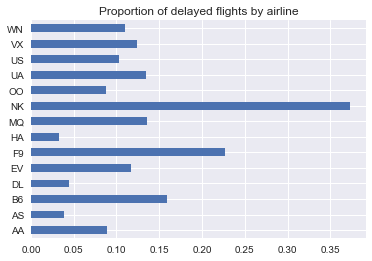

In [36]:
delay_prop.plot(kind="barh", title="Proportion of delayed flights by airline")

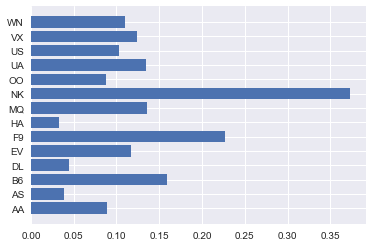

In [45]:
# can make this prettier later using code below
airlines = delay_prop.index
nums = np.arange(len(airlines))
plt.barh(nums, delay_prop.values)
ticks = plt.yticks(nums,airlines)

In [ ]:
# code from hw1-submission

# count how frequently which artist comes up
artist_frequency = flatframe['band_singer'].value_counts()

# only show artists who appear at least 15 times or more
top_artist_frequency = artist_frequency[artist_frequency > 14]

# plot a bar chart with the frequency an artist is in the top 100
sns.reset_defaults()
plt.figure(figsize=(5,4))
ax = plt.gca()
# store collected values in new lists, for plotting
artists = top_artist_frequency.index
freq = top_artist_frequency.values
nums = np.arange(len(top_artist_frequency))
plt.barh(nums, freq)
# annotate bars with frequency
for p, c, ch in zip(nums, artists, freq):
    plt.annotate(str(ch), xy=(ch + 0.25, p), va = 'center')
# editing ticks
ticks = plt.yticks(nums, artists)
xt = plt.xticks()[0]
plt.xticks(xt, [' '] * len(xt))
plt.grid(axis = 'x', color ='white', linestyle='-')
ax.tick_params(axis='both', which='both',length=0)
# invert y-axis
plt.gca().invert_yaxis()
# remove all axes
sns.despine(left=True, bottom=True)

In [21]:
#hw3 solutions
def plot_relevant_question(dataframe, ax, labels_to_use, criteria_label, criteria, boolean_query=True):
    df = dataframe.copy()
    
    if boolean_query:
        df['column_of_interest'] = df[criteria_label].isin(criteria)
        for g, group in df.groupby('column_of_interest'):
            group['count'].plot(kind='hist', ax=ax, alpha=0.3, label = labels_to_use[g])
        ax.legend(loc='best')
        
    else:
        for i, (g, group) in enumerate(df.groupby(criteria_label)):
            group['count'].plot(kind='hist', ax=ax[i], bins=10, alpha=0.3, label = labels_to_use[i])
            ax[i].set_title(labels_to_use[i])
            ax[i].set_xlim(0,9000)

fig, ax = plt.subplots(1,2,figsize=(15,5))
plot_relevant_question(df, ax[0], )

In [61]:
df['ORIGIN_AIRPORT'].value_counts()

ATL      50537
ORD      34829
DFW      31217
DEN      25876
LAX      25870
PHX      21429
IAH      19868
SFO      18056
LAS      17496
MSP      16252
SEA      16129
DTW      15468
MCO      15275
BOS      14653
SLC      14485
CLT      13353
EWR      13284
LGA      12152
JFK      11351
BWI      10952
DCA      10556
FLL      10226
SAN       9948
MDW       9854
TPA       9174
PHL       8616
MIA       8316
DAL       7820
PDX       7131
HOU       6951
         ...  
12888        8
11905        7
11867        7
15070        7
13344        7
11076        7
11447        7
11980        6
14543        6
ITH          5
10333        5
11097        5
13127        4
10170        4
12094        4
13964        4
12016        4
12265        4
14025        4
13459        4
11617        3
10581        3
10154        3
15841        3
10165        2
14222        1
13502        1
15497        1
11503        1
13541        1
Name: ORIGIN_AIRPORT, Length: 628, dtype: int64

In [49]:
# number of flights per airline
(df['ORIGIN_AIRPORT']=="ORD").value_counts()

False    770112
True      34829
Name: ORIGIN_AIRPORT, dtype: int64

3. (15pts) Perform EDA to gain intuition of the factors that affect delay and provide visuals: do delays vary across airlines, or time of departure, or airport (do, at the very least, Chicago (ORD), Boston (BOS), and your favorite another airport), or airport traffic?

## Deliverable: 
A well presented notebook with well structured and documented code to answer questions 1-7 (plus additional questions for 209 students) with brief explanations and/or clarifications (10pts for overall presenation). The last cell should contain the report for question 8.



## Hints
1. For the classification model, an AUC of approximately 0.6 should be your base model. 
2. $R^2>0.03$ for the regression is good, $R^2>0.05$ very good, and $R^2>0.1$ is impressive (measured on the log scale). 